In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.activations import relu, sigmoid

from sklearn.metrics import confusion_matrix
import seaborn as sns


In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.shape

(891, 12)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#preprocessing

df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())


categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols,dtype=int)

float_cols = df.select_dtypes(include=['float']).columns
scaler=StandardScaler()
df[float_cols]=scaler.fit_transform(df[float_cols])

y_train=df['Survived']
df=df.drop(['Survived'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(df, y_train,test_size=0.20,random_state=32)


In [11]:
df.head(5)


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,0,1,0,0,1
1,1,0.663861,1,0,0.786845,1,0,1,0,0
2,3,-0.258337,0,0,-0.488854,1,0,0,0,1
3,1,0.433312,1,0,0.420730,1,0,0,0,1
4,3,0.433312,0,0,-0.486337,0,1,0,0,1


In [12]:
model=Sequential([
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
    
)


history = model.fit(x_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
23/23 [==============================] - 1s 2ms/step - loss: 0.7917 - accuracy: 0.4846
Epoch 2/300
23/23 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.6053
Epoch 3/300
23/23 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.6461
Epoch 4/300
23/23 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6643
Epoch 5/300
23/23 [==============================] - 0s 1ms/step - loss: 0.5998 - accuracy: 0.6966
Epoch 6/300
23/23 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7331
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7219
Epoch 8/300
23/23 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7416
Epoch 9/300
23/23 [==============================] - 0s 1ms/step - loss: 0.5275 - accuracy: 0.7626
Epoch 10/300
23/23 [==============================] - 0s 1ms/step - loss: 0.5452 - accuracy: 0.7584
Epoch 11/

In [13]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

23/23 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8581
[0.328404039144516, 0.858146071434021]
6/6 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.8212
[0.4836179316043854, 0.8212290406227112]


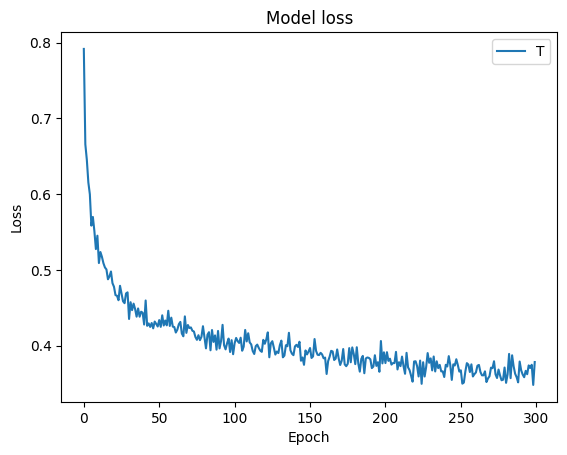

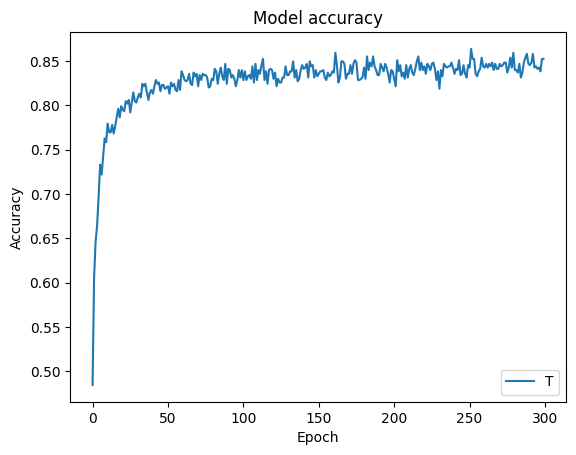

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend('Train', loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend('Train', loc='lower right')
plt.show()

6/6 [==============================] - 0s 1ms/step


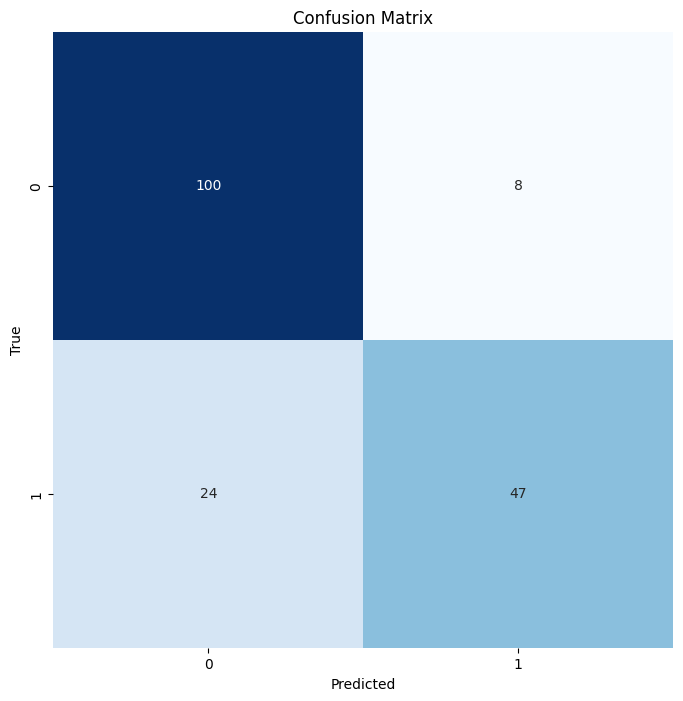

In [15]:
predictions = model.predict(x_test)
for i in range(predictions.shape[0]):
    if predictions[i]>0.5:
        predictions[i]=1
    else:
        predictions[i]=0

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
class_names = [str(i) for i in range(2)]  
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

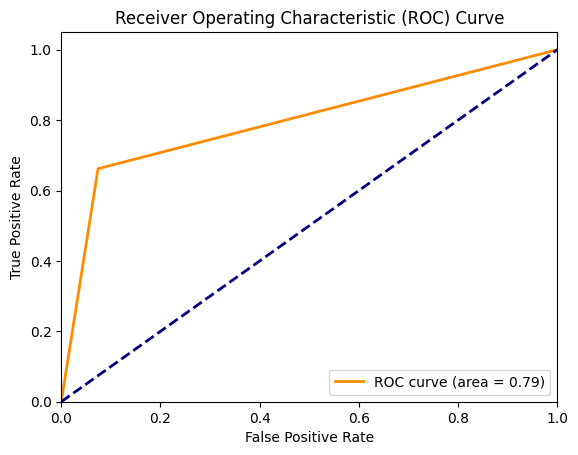

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_score contains the predicted scores/probabilities
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [18]:
model.save('model_proj.h5')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
